In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Three trends based on data.
#Observed Trend 1: There are far more rides counted in urban environments than in suburban or rural.
#Observed Trend 2: The fares in rural areas are higher, per the bubble plot, than urban or suburban fares.
#Observed Trend 3: The fares and total number of rides for suburban areas were both between urban and rural numbers.

In [3]:
#import city data
city_data = pd.read_csv('city_data.csv')
city_data.keys()

Index(['city', 'driver_count', 'type'], dtype='object')

In [4]:
#import ride data
ride_data = pd.read_csv('ride_data.csv')
ride_data.keys()

Index(['city', 'date', 'fare', 'ride_id'], dtype='object')

In [5]:
#combine data tables into one data frame, view first line to see the column names
merged_data = pd.DataFrame.merge(city_data, ride_data,on='city', how='outer')
merged_data.head(1)

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795


In [6]:
#calculate variables for bubble plot
#x_ = rides by city per city type (urban, suburban, rural)
#y_ = average fare by city per city type
#s_ = total drivers by city per city type


x_urban = merged_data.loc[merged_data['type'] == 'Urban']
x_urban = x_urban.groupby(['city'])
x_urban = x_urban['ride_id'].count()

x_suburban = merged_data.loc[merged_data['type'] == 'Suburban']
x_suburban = x_suburban.groupby(['city'])
x_suburban = x_suburban['ride_id'].count()

x_rural = merged_data.loc[merged_data['type'] == 'Rural']
x_rural = x_rural.groupby(['city'])
x_rural = x_rural['ride_id'].count()

y_urban = merged_data.loc[merged_data['type'] == 'Urban']
y_urban = y_urban.groupby(['city'])
y_urban = y_urban['fare'].mean()

y_suburban = merged_data.loc[merged_data['type'] == 'Suburban']
y_suburban = y_suburban.groupby(['city'])
y_suburban = y_suburban['fare'].mean()

y_rural = merged_data.loc[merged_data['type'] == 'Rural']
y_rural = y_rural.groupby(['city'])
y_rural = y_rural['fare'].mean()

s_urban = merged_data.loc[merged_data['type'] == 'Urban']
s_urban = s_urban.groupby(['city'])
s_urban = s_urban['driver_count'].sum()

s_suburban = merged_data.loc[merged_data['type'] == 'Suburban']
s_suburban = s_suburban.groupby(['city'])
s_suburban = s_suburban['driver_count'].sum()

s_rural = merged_data.loc[merged_data['type'] == 'Rural']
s_rural = s_rural.groupby(['city'])
s_rural = s_rural['driver_count'].sum()

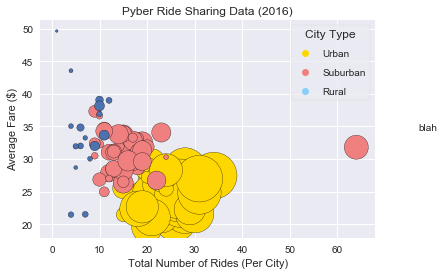

In [14]:
# print the bubble plot
fig, ax = plt.subplots()
ax.scatter(x_urban, y_urban, s=s_urban, color='gold', edgecolor='k')
ax.plot([], [], 'o', color='gold')
ax.scatter(x_suburban, y_suburban, s=s_suburban, color='lightcoral', edgecolor='k')
ax.plot([], [], 'o', color='lightcoral')
ax.scatter(x_rural, y_rural, s=s_rural, edgecolor='k')
ax.plot([], [], 'o', color='lightskyblue')

plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
plt.text(1.0, 0.5, 'blah', fontsize=10, transform=plt.gcf().transFigure)


plt.legend(['Urban', 'Suburban', 'Rural'], scatterpoints = 1, frameon=True,labelspacing=1, ncol = 1, title='City Type')
sns.set(style='darkgrid')
plt.show()

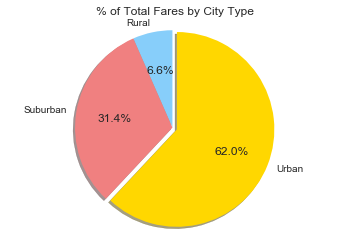

In [15]:
#print first pie chart displaying total fares by city type
pie_chart_1 = merged_data.groupby(['type'])
pie_chart_1 = pie_chart_1['fare'].sum()
pie_chart_1 = pie_chart_1 / len(merged_data)*100

#Pie Chart 1
pc_1_labels = pie_chart_1.keys()
colors = ["lightskyblue", "lightcoral", "gold"]
explode = (0, 0, 0.05)

plt.title("% of Total Fares by City Type")
plt.pie(pie_chart_1, explode=explode, labels=pc_1_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

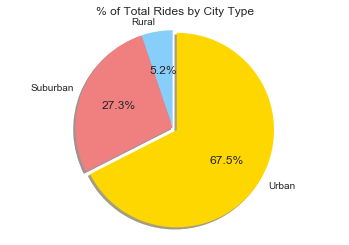

In [16]:
#print second pie chart displaying total rides by city type
pie_chart_2 = merged_data.groupby(['type'])
pie_chart_2 = pie_chart_2['date'].count()
pie_chart_2 = pie_chart_2 / len(merged_data)*100

#Pie Chart 2
pc_2_labels = pie_chart_2.keys()
colors = ["lightskyblue", 'lightcoral', "gold"]
explode = (0, 0, 0.05)

plt.title("% of Total Rides by City Type")
plt.pie(pie_chart_2, explode=explode, labels=pc_2_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()

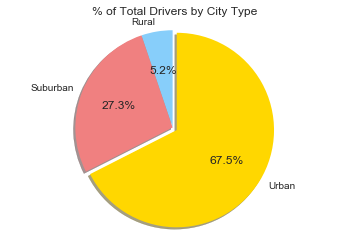

In [17]:
#print third pie chart displaying total drivers by city type
pie_chart_3 = merged_data.groupby(['type'])
pie_chart_3 = pie_chart_3['driver_count'].mean()
pie_chart_3 = pie_chart_3 / len(merged_data)*100

#Pie Chart 3
pc_3_labels = pie_chart_3.keys()
colors = ["lightskyblue", "lightcoral", "gold"]
explode = (0, 0, 0.05)

plt.title("% of Total Drivers by City Type")
plt.pie(pie_chart_2, explode=explode, labels=pc_2_labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()